In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import streamlit as st

# Load dataset (Replace with actual dataset path)
df = pd.read_csv("employee_salary_data.csv")
df.isnull()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
6699,False,False,False,False,False,False
6700,False,False,False,False,False,False
6701,False,False,False,False,False,False
6702,False,False,False,False,False,False


In [2]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [4]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [5]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [ ]:
#droping the null values
df.dropna(inplace=True)

In [7]:
df['Job Title'].value_counts()

Job Title
Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Software Project Manager        1
Name: count, Length: 191, dtype: int64

In [ ]:
#selecting the job titles with lessthan 25 count
job_title_count = df['Job Title'].value_counts()
job_title_edited = job_title_count[job_title_count<=25]
job_title_edited.count()

142

In [ ]:
# replacing the selected titles with others
df['Job Title']=df['Job Title'].apply(lambda x : 'others' if x in job_title_edited else x)
df['Job Title'].nunique()

50

In [10]:
df['Education Level'].value_counts()

Education Level
Bachelor's Degree    2265
Master's Degree      1572
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64

In [ ]:
# arranging the education level
df['Education Level'].replace(["Bachelor's Degree","Master's Degree","phD"],["Bachelor's","Master's","PhD"],inplace=True)
df['Education Level'].value_counts()

C:\Users\rgoud\AppData\Local\Temp\ipykernel_19844\232192131.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Education Level'].replace(["Bachelor's Degree","Master's Degree","phD"],["Bachelor's","Master's","PhD"],inplace=True)


Education Level
Bachelor's     3021
Master's       1860
PhD            1369
High School     448
Name: count, dtype: int64

In [12]:
df['Gender'].value_counts()

Gender
Male      3671
Female    3013
Other       14
Name: count, dtype: int64

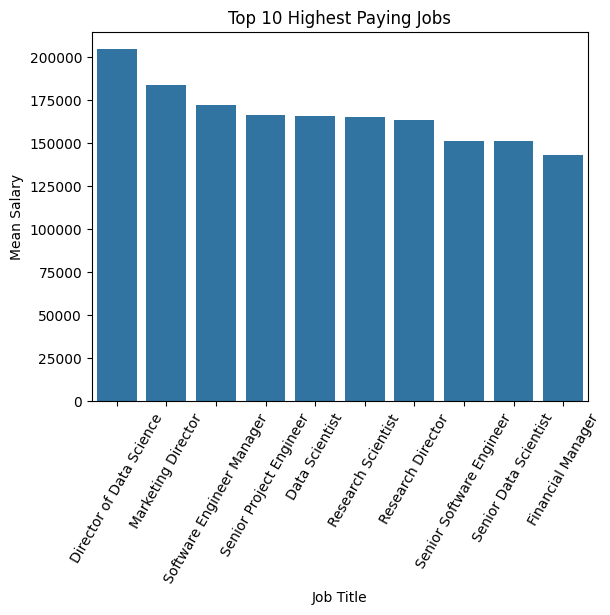

In [ ]:
# plotting the top 10 highest salary paying jobs
top_10_highest_paying_jobs=df.groupby('Job Title')['Salary'].mean().nlargest(10)
sns.barplot(x=top_10_highest_paying_jobs.index,y=top_10_highest_paying_jobs.values)
plt.xlabel('Job Title')
plt.ylabel('Mean Salary')
plt.title('Top 10 Highest Paying Jobs')
plt.xticks(rotation=60)

plt.show()

In [ ]:
# calculating  lower and upper bounds
Q1=df.Salary.quantile(0.25)
Q3=df.Salary.quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
print(lower)
print(upper)

-65000.0
295000.0


In [ ]:
# outliers
df[df.Salary<lower]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


In [ ]:
# outliers
df[df.Salary>upper]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


In [ ]:
# data transformation
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Gender']=encoder.fit_transform(df['Gender'])
df['Education Level']=encoder.fit_transform(df['Education Level'])
df['Job Title']=encoder.fit_transform(df['Job Title'])
df
# dummies = pd.get_dummies(df['Job Title'],drop_first=True).astype(int)
# df = pd.concat([df,dummies],axis=1)
# # Drop Job Title column
# df.drop('Job Title',inplace=True,axis=1)

# dummies = pd.get_dummies(df['Gender'],drop_first=True)
# df = pd.concat([df,dummies],axis=1)
# # Drop Gender column
# df.drop('Gender',inplace=True,axis=1)

# dummies = pd.get_dummies(df['Education Level'],drop_first=True)
# df = pd.concat([df,dummies],axis=1)
# # Drop Education Level column
# df.drop('Education Level',inplace=True,axis=1)
# df.head()


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,46,5.0,90000.0
1,28.0,0,2,2,3.0,65000.0
2,45.0,1,3,49,15.0,150000.0
3,36.0,0,0,33,7.0,60000.0
4,52.0,1,2,49,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,0,3,7,20.0,200000.0
6700,32.0,1,1,33,3.0,50000.0
6701,30.0,0,0,9,4.0,55000.0
6702,46.0,1,2,26,14.0,140000.0


In [ ]:
# selecting the features
features=df.drop('Salary',axis=1)
features

,Age,Gender,Education Level,Job Title,Years of Experience
0,32.0,1,0,46,5.0
1,28.0,0,2,2,3.0
2,45.0,1,3,49,15.0
3,36.0,0,0,33,7.0
4,52.0,1,2,49,20.0
...,...,...,...,...,...
6699,49.0,0,3,7,20.0
6700,32.0,1,1,33,3.0
6701,30.0,0,0,9,4.0
6702,46.0,1,2,26,14.0


In [ ]:
# selecting the target variable
target=df['Salary']
target

0        90000.0
1        65000.0
2       150000.0
3        60000.0
4       200000.0
          ...   
6699    200000.0
6700     50000.0
6701     55000.0
6702    140000.0
6703     35000.0
Name: Salary, Length: 6698, dtype: float64

In [ ]:
# spliting the data and trainingthe model
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.25,random_state=42)
lreg=LinearRegression()
lreg.fit(X_train,y_train)

LinearRegression()

In [ ]:
# accuracy
lreg.score(X_test,y_test)

0.680633454376153

In [ ]:
# error calculation
y_pred_lreg = lreg.predict(X_test)

print("Mean Squared Error :",mean_squared_error(y_test,y_pred_lreg))
print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred_lreg))
print("Root Mean Squared Error :",r2_score(y_test,y_pred_lreg))

Mean Squared Error : 910602793.904555
Mean Absolute Error : 23642.925826484214
Root Mean Squared Error : 0.680633454376153


In [ ]:
# spliting the data and trainingthe model
model = DecisionTreeRegressor(max_depth=10,min_samples_split=2,random_state=0)
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, random_state=0)

In [ ]:
# accuracy
model.score(X_test,y_test)

0.9532538922060958

In [ ]:
# error calculation
y_pred_model = model.predict(X_test)

print("Mean Squared Error :",mean_squared_error(y_test,y_pred_model))
print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred_model))
print("Root Mean Squared Error :",r2_score(y_test,y_pred_model))

Mean Squared Error : 133286147.04505914
Mean Absolute Error : 5598.007409606959
Root Mean Squared Error : 0.9532538922060958


In [ ]:
# storing the model in the pickle
import pickle

with open("model.pkl", "wb") as file:
    pickle.dump(model, file)
